In [3]:
#!/usr/bin/env python

# Re-draw Durer's Rhinoceros using Matplotlib

import sys
import matplotlib
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from matplotlib.patches import Polygon
from matplotlib import font_manager

from PIL import Image
import numpy as np
from utils import colours


import numpy as np
from scipy.interpolate import interp1d

def smoothLine(x, y, num_points=100):
    t = np.arange(len(x))
    interp_func_x = interp1d(t, x, kind='cubic')
    interp_func_y = interp1d(t, y, kind='cubic')
    new_t = np.linspace(0, len(x) - 1, num_points)
    return interp_func_x(new_t), interp_func_y(new_t)


# Load the original
bg_im = Image.open(r"data\test.jpg")
bg_im = bg_im.convert("RGB")
# Convert to numpy array on 0-1
bg_im = np.array(bg_im) / 255.0

# Figure setup
fig = Figure(
    figsize=(3000 / 100, 2368 / 100),  # Width, Height (inches)
    dpi=300,
    facecolor=colours["background"],
    edgecolor=None,
    linewidth=0.0,
    frameon=True,
    subplotpars=None,
    tight_layout=None,
)
canvas = FigureCanvas(fig)
font = {"family": "sans-serif", "sans-serif": "Arial", "weight": "normal", "size": 18}
matplotlib.rc("font", **font)

# Put image in as background - hidden in final result
axb = fig.add_axes([0, 0, 1, 1])
axb.set_axis_off()
axb.set_xlim(0, 1)
axb.set_ylim(0, 1)
# Add the image
bgi_extent = [0.03, 0.98, 0.03, 0.98]
# axb.imshow(bg_im, extent=bgi_extent, aspect="auto", alpha=0.5)

# Put some text in at the top
header_font = font_manager.FontProperties(
    family="Noto Serif", weight="bold", style="italic"
)
header = (
    "On 20 May 1515, an Indian rhinoceros named Ulysses arrived in Lisbon"
    + " from the Far East - the first rhinoceros seen in Europe since Roman times."
    + " It was a gift to to King Manuel I of Portugal"
    + " from Afonso de \n Albuquerque, governor of Portuguese India. The king regifted"
    + " it to Pope Leo X, but it died in a shipwreck off the coast of Italy."
    + " Although the artist Albrecht Dürer never saw the animal, he created a"
    + " famous\nwoodcut of it, based on a sketch and description."
    + " Dürer's genius was such that his image, while not anatomically accurate, is"
    + " better than reality - it shows what a rhinoceros ought to look like. It was"
    + " the\nstandard representation of the animal for centuries, and remains iconic"
    + " today. In 2003 John Hunter released matplotlib, a python library for"
    + " making 2d plots, which has since become an invaluable tool\nfor scientific"
    + " visualization. The scope and power of matplotib make it the perfect choice"
    + " for reimagining a classic image."
)
axb.text(
    x=0.02,
    y=0.98,
    s=header,
    ha="left",
    va="top",
    fontsize=20,
    fontproperties=header_font,
)

# Add a grid of axes
gspec = matplotlib.gridspec.GridSpec(
    ncols=4,
    nrows=5,
    figure=fig,
    width_ratios=[
        1.5,
        1.5,
        1.5,
        1.5,
    ],
    height_ratios=[1, 1, 1, 1, 1],
    wspace=0.1,
    hspace=0.1,
)
# Set the space the subplots take up
fig.subplots_adjust(left=0.02, right=0.99, bottom=0.02, top=0.9)


# Each subplot has a separate function to draw it

# Top Left
from pTL import pTL

ax_TL = pTL(fig, gspec[0, 0])

# Top Centre Left
from pTCL import pTCL

ax_TCL = pTCL(fig, gspec[0, 1])

# Top Right and Centre Right
from pTCR_TR import pTCR_TR

ax_TCR_TR = pTCR_TR(fig, gspec[0, 2:4])

# 2nd Left
from p2L import p2L

ax_2L = p2L(fig, gspec[1, 0])

# 2nd and 3rd Centre Left
from p2CL_3CL import p2CL_3CL

ax_2CL_3CL = p2CL_3CL(fig, gspec[1:3, 1])

# 2nd Centre Right
from p2CR import p2CR

ax_2CR = p2CR(fig, gspec[1, 2])

# 2nd Right
from p2R import p2R

ax_2R = p2R(fig, gspec[1, 3], bg_im, bgi_extent)

# 3rd Left
from p3L import p3L

ax_3L = p3L(fig, gspec[2, 0])

# 3rd Centre Right
from p3CR import p3CR

ax_3CR = p3CR(fig, gspec[2, 2])

# 3rd and 4th Right
from p3R_4R import p3R_4R

ax_3R_4R = p3R_4R(fig, gspec[2:4, 3], bg_im, bgi_extent)

# 4th and 5th Left
from p4L_5L import p4L_5L

ax_4L_5L = p4L_5L(fig, gspec[3:5, 0])

# 4th Centre Left
from p4CL import p4CL

ax_4CL = p4CL(fig, gspec[3, 1])

# 4th and 5th Centre Right
from p4CR_5CR import p4CR_5CR

ax_4CR_5CR = p4CR_5CR(fig, gspec[3:5, 2])

# 5th Centre Left
from p5CL import p5CL

ax_5CL = p5CL(fig, gspec[4, 1])

# 5th Right
from p5R import p5R

ax_5R = p5R(fig, gspec[4, 3])

# Render the new image
fig.savefig("modern_rhinoceros.webp")


ImportError: cannot import name 'colours' from 'utils' (d:\PYTHONLANG\Python10.6\lib\site-packages\utils\__init__.py)

In [ ]:
import cv2
import caffe
import numpy as np

# Загрузка предобученной модели
net = caffe.Net('path_to_deploy.prototxt', 'path_to_pretrained_model.caffemodel', caffe.TEST)

# Загрузка меток классов (если доступны)
# labels = [line.strip() for line in open('path_to_labels.txt')]

# Загрузка изображения или видео
input_image = cv2.imread('path_to_image_or_video_frame.jpg')

# Подготовка изображения для входа в сеть
input_blob = cv2.dnn.blobFromImage(input_image, scalefactor=1.0, size=(300, 300), mean=(104.0, 177.0, 123.0))

# Передача изображения через сеть и получение вывода
net.setInput(input_blob)
detections = net.forward()

# Обработка результатов детектирования
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    
    # Отсеивание слабых детекций
    if confidence > 0.5:
        # Получение координат ограничивающего прямоугольника
        box = detections[0, 0, i, 3:7] * np.array([input_image.shape[1], input_image.shape[0], input_image.shape[1], input_image.shape[0]])
        (startX, startY, endX, endY) = box.astype("int")
        
        # Отрисовка ограничивающего прямоугольника и метки класса (если доступны)
        cv2.rectangle(input_image, (startX, startY), (endX, endY), (0, 255, 0), 2)
        # class_idx = int(detections[0, 0, i, 1])
        # label = "{}: {:.2f}%".format(labels[class_idx], confidence * 100)
        # cv2.putText(input_image, label, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Отображение результата
cv2.imshow("Output", input_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


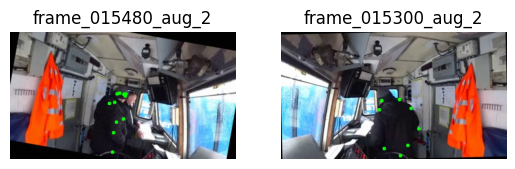

<Figure size 2000x4000 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Путь к изображениям
path_img1 = r'data\annotations\poses\frame_015480_aug_2.jpg'
path_img2 = r'data\annotations\poses\frame_015300_aug_2.jpg'

# Загрузка изображений
img1 = mpimg.imread(path_img1)
img2 = mpimg.imread(path_img2)

# Создание subplot с двумя изображениями
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.figure(figsize=(20, 40))

# Отображение первого изображения
ax1.imshow(img1)
ax1.axis('off')  # Отключение осей координат
ax1.set_title('frame_015480_aug_2')

# Отображение второго изображения
ax2.imshow(img2)
ax2.axis('off')  # Отключение осей координат
ax2.set_title('frame_015300_aug_2')

# Показать изображения
plt.show()
